 Negin Kazemipourleilabadi  2018801021
 
 IE582-Homework3


In [377]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime as dt
import cv2
import itertools
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plb
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [379]:
data=pd.read_csv("C:/Users/negin/Desktop/GercekZamanliTuketim.csv", sep=';', encoding='cp1252', 
                thousands='.',decimal=',')



In [380]:
data.columns=["Date","Hour","Consumption(MWh)"]
data["DateTime"] = data["Date"] + " " +data["Hour"]



In [381]:
data

,Date,Hour,Consumption(MWh),DateTime
0,2016-01-01,00:00,26277.24,2016-01-01 00:00
1,2016-01-01,01:00,24991.82,2016-01-01 01:00
2,2016-01-01,02:00,23532.61,2016-01-01 02:00
3,2016-01-01,03:00,22464.78,2016-01-01 03:00
4,2016-01-01,04:00,22002.91,2016-01-01 04:00
...,...,...,...,...
33595,2019-11-01,19:00,36056.96,2019-11-01 19:00
33596,2019-11-01,20:00,35130.19,2019-11-01 20:00
33597,2019-11-01,21:00,33947.64,2019-11-01 21:00
33598,2019-11-01,22:00,32877.69,2019-11-01 22:00


In [382]:
data.set_index('Date',inplace=True)
#data["Consumption(MWh)"]=data["Consumption(MWh)"].astype(float)

In [383]:
data["Consumption(MWh)"]=data["Consumption(MWh)"].astype(float)

In [384]:
data=data.reset_index()

In [385]:
data["Lag_48"]=data["Consumption(MWh)"].shift(48)
data.dropna(how='any',inplace=True)

In [386]:
data["Lag_168"]=data["Consumption(MWh)"].shift(168)
data.dropna(how='any',inplace=True)

In [387]:
data.columns= ['Date','Hour','Consumption','DateTime','Lag_48','Lag_168']


In [388]:
data.head()


,Date,Hour,Consumption,DateTime,Lag_48,Lag_168
216,2016-01-10,00:00,28890.37,2016-01-10 00:00,28602.02,27613.96
217,2016-01-10,01:00,27133.75,2016-01-10 01:00,27112.37,25779.28
218,2016-01-10,02:00,25656.13,2016-01-10 02:00,25975.34,24566.31
219,2016-01-10,03:00,24937.87,2016-01-10 03:00,25315.55,23878.42
220,2016-01-10,04:00,24538.16,2016-01-10 04:00,25128.15,23511.38


In [389]:
#test_data=data[33578:]
#train_data=data[data['Date']< '2019-11-01 00:00:00']
test_data=data[data['Date']>= '2019-11-01']
train_data=data[data['Date']< '2019-11-01']

In [390]:
#Part a MAPE values for the test period

def MAPE(actual, prediction):
    actual=np.array(actual)
    prediction=np.array(prediction)
    return np.mean(np.abs((actual-prediction)/actual))*100

In [391]:

MAPE_Lag_48=MAPE(test_data['Consumption'],test_data['Lag_48'])
print("MAPE value for Lag_48 is:" + "%" +str(MAPE_Lag_48))


MAPE value for Lag_48 is:%4.447784190089714


In [392]:

MAPE_Lag_168=MAPE(test_data['Consumption'],test_data['Lag_168'])
print("MAPE value for Lag_168 is:" + "%" +str(MAPE_Lag_168))


MAPE value for Lag_168 is:%2.63293095245023


Part a) As we can see the MAPE value for Lag_168 is lower than the MAPE value for Lag_48 because we use more data (from past values) and our prediction is more accurate.



In [393]:
#creating Long format for part b
long_format=data.copy()
long_format["Lag_48"]=data["Consumption"].shift(48)
long_format["Lag_168"]=data["Consumption"].shift(168)
long_format.dropna(how='any',inplace=True)
long_format

,Date,Hour,Consumption,DateTime,Lag_48,Lag_168
384,2016-01-17,00:00,28125.56,2016-01-17 00:00,29667.03,28890.37
385,2016-01-17,01:00,26344.08,2016-01-17 01:00,27961.70,27133.75
386,2016-01-17,02:00,25233.20,2016-01-17 02:00,26760.14,25656.13
387,2016-01-17,03:00,24526.40,2016-01-17 03:00,26351.43,24937.87
388,2016-01-17,04:00,24131.34,2016-01-17 04:00,26190.00,24538.16
...,...,...,...,...,...,...
33595,2019-11-01,19:00,36056.96,2019-11-01 19:00,36219.71,35698.70
33596,2019-11-01,20:00,35130.19,2019-11-01 20:00,35136.55,34820.93
33597,2019-11-01,21:00,33947.64,2019-11-01 21:00,34155.15,33659.48
33598,2019-11-01,22:00,32877.69,2019-11-01 22:00,32878.23,32696.81


In [394]:
#Part b Linear Regression

test_long=long_format[long_format['Date']>= '2019-11-01']
train_long=long_format[long_format['Date']< '2019-11-01']
X=train_long[['Lag_48','Lag_168']]
Y=train_long['Consumption']
regression=LinearRegression()
regression.fit(X,Y)
y_true=test_long['Consumption']
x_predict=test_long[['Lag_48','Lag_168']]
y_predict=regression.predict(x_predict)
linear_mape=MAPE(y_true,y_predict)
print('MAPE for linear regression is  : '  + str(linear_mape))
print('Coefficient for lag48:' + str(regression.coef_[0])  + ' and coefficient for lag168 :'  + str (regression.coef_[1]))
print('Intercept value is' + str(regression.intercept_))

MAPE for linear regression is  : 2.920088150346613
Coefficient for lag48:0.325443700079999 and coefficient for lag168 :0.6252477343538021
Intercept value is1607.7293629522683


Part b) The MAPE value for linear regression model is 2.92 percent which is a value between using the Lag48 and Lag168.
Is is something reasonable and the coefficients for lag48 and lag168 are as 0.325 and 0.625 respectively. Also the intercept value is 1607.72.


In [395]:
# Part C 
hours= ['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00',
       '13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00']
MAPE_results=[]
regression=LinearRegression()
for i in range (0,24):
    train_prime=train_long[train_long.Hour==hours[i]]
    test_prime=test_long[test_long.Hour==hours[i]]
    X=train_prime[['Lag_48','Lag_168']]
    Y=train_prime['Consumption']
    regression=LinearRegression()
    regression.fit(X,Y)
    y_true=test_prime['Consumption']
    x_predict=test_prime[['Lag_48','Lag_168']]
    y_predict=regression.predict(x_predict)
    linear_mape=MAPE(y_true,y_predict)
    print('MAPE value for linear regression for ' + hours[i]+ 'is : ' + str(linear_mape))
    print('')
    MAPE_results.append(linear_mape)
    


MAPE value for linear regression for 00:00is : 3.263860468820378

MAPE value for linear regression for 01:00is : 3.0582014362530265

MAPE value for linear regression for 02:00is : 3.557967961952439

MAPE value for linear regression for 03:00is : 3.308944242651312

MAPE value for linear regression for 04:00is : 2.73843043482726

MAPE value for linear regression for 05:00is : 3.1497461978707832

MAPE value for linear regression for 06:00is : 2.8006660148879003

MAPE value for linear regression for 07:00is : 1.953952596400262

MAPE value for linear regression for 08:00is : 2.287296229147997

MAPE value for linear regression for 09:00is : 2.7174221192955375

MAPE value for linear regression for 10:00is : 4.45818922580818

MAPE value for linear regression for 11:00is : 4.751831391341398

MAPE value for linear regression for 12:00is : 5.141847995101261

MAPE value for linear regression for 13:00is : 5.494837448568943

MAPE value for linear regression for 14:00is : 6.680840801733301

MAPE val

Part c) The highest value for MAPE is 6.68 which belongs to 14:00 and the lowest value is 0.13 and it belongs to hour 21:00.
Each hour has differenet MAPE values.

In [396]:
#Part d
data1=pd.read_csv("C:/Users/negin/Desktop/data1.csv", encoding='unicode_escape', sep=';')

In [397]:
consumption = data1['Tüketim Miktarý (MWh)'].tolist()
dates = data1['Tarih'].tolist()
hours = data1['Saat'].tolist()
datetimes =data1['Tarih'].tolist()


for i in range (0,data1.shape[0]):
    datetimes[i] = datetimes[i].replace('.','/') + " " + hours[i]
    dates[i] = dates[i].replace('.','/')
    consumption[i] = float(consumption[i].replace('.','').replace(',','.'))
    
datetimes_list = [dt.datetime.strptime(date, '%d/%m/%Y %H:%M') for date in datetimes]
dates_list = [dt.datetime.strptime(date, '%d/%m/%Y') for date in dates]

data1['Datetime'] = datetimes_list
data1['Tarih'] = dates_list
data1['Tüketim Miktarý (MWh)'] = consumption


In [399]:
ne = []
ka = []
lag_data1 = []
lag_data2 = []
ne = []
ka = []

for i in range (0,data1.shape[0]):
    ne = (data1[data1['Tarih'] == data1.iloc[i]['Tarih'] \
    - dt.timedelta(days=7)]['Tüketim Miktarý (MWh)']).values
    ka = (data1[data1['Tarih'] == data1.iloc[i]['Tarih'] \
    - dt.timedelta(days=2)]['Tüketim Miktarý (MWh)']).values
    lag_data1.append(ne)
    lag_data2.append(ka)
    ne = []
    ka = []

In [400]:
column_1 = []
column_2 = []
for i in range(0,24):
    column_1.append('Lag_day7_hour_' + str(i))
    column_2.append('Lag_day2_hour_' + str(i))
lags1 = pd.DataFrame(lag_data1,columns=column_1)
lags2 = pd.DataFrame(lag_data2,columns=column_2)
lags1['Datetime'] = data1['Datetime']
lags2['Datetime'] = data1['Datetime']
lags = pd.merge(lags1, lags2, how='left', on=['Datetime'])
data1_wide = pd.merge(data1, lags, how='left', on=['Datetime'])
data1_wide = (data1_wide.dropna()).reset_index(drop=True)
data1_wide.head()

,Tarih,Saat,Tüketim Miktarý (MWh),Datetime,Lag_day7_hour_0,Lag_day7_hour_1,Lag_day7_hour_2,Lag_day7_hour_3,Lag_day7_hour_4,Lag_day7_hour_5,...,Lag_day2_hour_14,Lag_day2_hour_15,Lag_day2_hour_16,Lag_day2_hour_17,Lag_day2_hour_18,Lag_day2_hour_19,Lag_day2_hour_20,Lag_day2_hour_21,Lag_day2_hour_22,Lag_day2_hour_23
0,2016-01-08,00:00,28602.02,2016-01-08 00:00:00,26277.24,24991.82,23532.61,22464.78,22002.91,21957.08,...,36847.22,36433.88,37581.09,37304.52,35832.0,34499.94,33670.0,32931.12,32913.06,31450.65
1,2016-01-08,01:00,27112.37,2016-01-08 01:00:00,26277.24,24991.82,23532.61,22464.78,22002.91,21957.08,...,36847.22,36433.88,37581.09,37304.52,35832.0,34499.94,33670.0,32931.12,32913.06,31450.65
2,2016-01-08,02:00,25975.34,2016-01-08 02:00:00,26277.24,24991.82,23532.61,22464.78,22002.91,21957.08,...,36847.22,36433.88,37581.09,37304.52,35832.0,34499.94,33670.0,32931.12,32913.06,31450.65
3,2016-01-08,03:00,25315.55,2016-01-08 03:00:00,26277.24,24991.82,23532.61,22464.78,22002.91,21957.08,...,36847.22,36433.88,37581.09,37304.52,35832.0,34499.94,33670.0,32931.12,32913.06,31450.65
4,2016-01-08,04:00,25128.15,2016-01-08 04:00:00,26277.24,24991.82,23532.61,22464.78,22002.91,21957.08,...,36847.22,36433.88,37581.09,37304.52,35832.0,34499.94,33670.0,32931.12,32913.06,31450.65


In [401]:
train_wide=data1_wide[data1_wide['Tarih']  < '2019-11-01']
test_wide=data1_wide[data1_wide['Tarih']  >= '2019-11-01']
condition_for_train=column_data1+column_data2

In [402]:
Lasso_Results=[]
for i in range (0,24):
    train_data_wide=train_wide[train_wide.Saat==hours[i]]
    test_data_wide=test_wide[test_wide.Saat==hours[i]]
    regression=linear_model.LassoCV(cv=10, normalize=True, tol=0.001, selection='random', random_state=43,alphas=np.logspace(-4,2,100))
    X=train_data_wide[condition_for_train]
    Y=train_data_wide['Tüketim Miktarý (MWh)']
    regression.fit(X,Y)
    y_true=test_data_wide['Tüketim Miktarý (MWh)']
    x_predict=test_data_wide[condition_for_train]
    y_predict=regression.predict(x_predict)
    mape_for_lasso=MAPE(y_true,y_predict)
    print('MAPE value for Lasso regression for ('  +  hours[i] + ')is :' +  str(mape_for_lasso))
    print('')
    mape_for_lasso=float(mape_for_lasso)
    Lasso_Results.append(mape_for_lasso)

MAPE value for Lasso regression for (00:00)is :1.8748210921098103

MAPE value for Lasso regression for (01:00)is :1.6570314651123332

MAPE value for Lasso regression for (02:00)is :1.6681734802711696

MAPE value for Lasso regression for (03:00)is :1.6877996121610221

MAPE value for Lasso regression for (04:00)is :2.1103369327132193

MAPE value for Lasso regression for (05:00)is :1.5374506464111268

MAPE value for Lasso regression for (06:00)is :1.6734708439977222

MAPE value for Lasso regression for (07:00)is :2.1114648037352515

MAPE value for Lasso regression for (08:00)is :1.7801274825256261

MAPE value for Lasso regression for (09:00)is :0.7785404748368039

MAPE value for Lasso regression for (10:00)is :1.3331985975447824

MAPE value for Lasso regression for (11:00)is :2.157684654900181

MAPE value for Lasso regression for (12:00)is :2.093839100023719

MAPE value for Lasso regression for (13:00)is :3.553826257056949

MAPE value for Lasso regression for (14:00)is :3.9462375536417245

Part d) as we can see from the results the MAPE values are lower for Lasso regression and it predicts better. Maximum MAPE score is 3.94 which belongs to hour 14:00 and the minimum value is 0.77 and it belongs to 09:00.

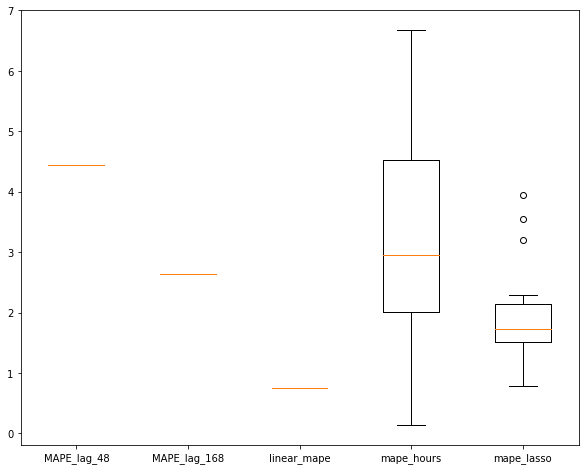

In [403]:
#Part F
plt.figure(figsize=(10,8))
a=24*[MAPE_Lag_48]
b=24*[MAPE_Lag_168]
c=24*[linear_mape]
d=MAPE_results
e=Lasso_Results
cases=[a,b,c,d,e]
plt.boxplot(cases)
plt.xticks([1, 2, 3, 4, 5], ['MAPE_lag_48', 'MAPE_lag_168', 'linear_mape', 'mape_hours', 'mape_lasso'])
plt.show()

Part f) As we can see from the boxplot, linear regression and Lasso regression have the minimum mean error values. At the other side Lag_48 gives the worst prediction scenario.